In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Reading the Data

In the following section the variables that are used have to be filled in. The possible variables that can be used are found in the `weathermerge.ipynb` file.

In [2]:
target = 'plh0182'

# all the time invariant variables
timeinvariant = [
    "sex", "bula_h", 'age', 'year'
]

# all the time variant variables
timevariant = [
    # soep covariates
    'partner', # partner
    'month', # month
    'plb0021', # unemployed
    'plh0171', # satisfaction with health
    'plh0175', # satisfaction with hh income
    'plh0182', # satisfaction with life
    'm11124', # Disability status
    'hlc0043', # number of children
    'e11103', # labour participation
    'hlf0001_h', # home ownership
    'hlc0005_h', # monthly hh income
    #'hlk0056', # type of interview
    
    # weather main vars
    'tavgbin_0_Msum', 'tavgbin_1_Msum', 'tavgbin_2_Msum', 
    'tavgbin_3_Msum', 'tavgbin_4_Msum', 'tavgbin_5_Msum', 'tavgbin_6_Msum', 'tavgbin_7_Msum',
    # weather control
    'prcp_Mmean', 'tsun_Mmean',
    'wspd_Mmean', 'pres_Mmean', 'snow_Mmean'#, 'tavg_Mstd', 'tavg_Mmean'
]

categorical = [
    'bula_h', 'sex', 'year', 'month',
    'plb0021', # unemployed
    'partner',
    'm11124', # Disability status
    'e11103', # labour participation
    'hlf0001_h', # home ownership
    #'hlk0056', # type of interview
]

# all the time variant variables that we want to calculcate the difference for
derivs = [
    'plh0171', # satisfaction with health
    'plh0175', # satisfaction with hh income
    'plh0182', # satisfaction with life
]

Below the data is being read based on the above specified variables.

In [3]:
# get all columns
columns = timeinvariant + timevariant + ['pid', 'year']

# read data frame
soep = pd.read_parquet('./prod/data.parquet.snappy', columns=list(columns))

# in case the index is also used as a control variable the indecies are copied
soep['yidx'], soep['pidx'] = soep['year'], soep['pid']
if not 'year' in timeinvariant + timevariant:
    soep.drop(columns='year', inplace=True)
if not 'pid' in timeinvariant + timevariant:
    soep.drop(columns='pid', inplace=True)

# set index
soep.set_index(['pidx', 'yidx'], inplace=True)
soep

,,sex,bula_h,age,year,partner,month,plb0021,plh0171,plh0175,plh0182,...,tavgbin_3_Msum,tavgbin_4_Msum,tavgbin_5_Msum,tavgbin_6_Msum,tavgbin_7_Msum,prcp_Mmean,tsun_Mmean,wspd_Mmean,pres_Mmean,snow_Mmean
pidx,yidx,,,,,,,,,,,,,,,,,,,,,
18801,1985,1.0,1.0,39.0,1985,1.0,3,2.0,7.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.489066,153.910909,16.067679,1022.710889,6.516484
18802,1985,2.0,1.0,34.0,1985,1.0,3,2.0,3.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.489066,153.910909,16.067679,1022.710889,6.516484
19301,1985,1.0,1.0,22.0,1985,2.0,3,2.0,8.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.489066,153.910909,16.067679,1022.710889,6.516484
19302,1985,2.0,1.0,23.0,1985,2.0,3,2.0,9.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.489066,153.910909,16.067679,1022.710889,6.516484
19001,1985,1.0,1.0,43.0,1985,2.0,3,1.0,9.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.538590,160.025455,14.883333,1023.257556,6.516484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38343901,2020,1.0,16.0,40.0,2020,1.0,12,1.0,4.0,NaN,7.0,...,0.0,0.0,0.0,0.0,0.0,0.483390,102.490000,12.314889,1016.004634,3.547619
37701301,2020,1.0,16.0,28.0,2020,0.0,12,2.0,10.0,NaN,6.0,...,0.0,0.0,0.0,0.0,0.0,0.397627,102.323333,11.976222,1016.154158,3.547619
37702501,2020,2.0,16.0,33.0,2020,0.0,12,1.0,8.0,NaN,6.0,...,0.0,0.0,0.0,0.0,0.0,0.397627,102.323333,11.976222,1016.154158,3.547619


# Data Preparation

In the following the data is brought into the right format for the Decision Tree Regressor. This includes the steps:
1. First the frequency of values for the categorical variables is checked. Some variables have very infrequent values that should be removed.
2. Partition data into timevariant and timeinvariant variables. The timevariant data is process as follows:
    1. For each subject fill in missing survey years.
    2. Forward fill nan values (only when two consecutive survey years are missing).
    3. Remove remaining nan values.
    4. Create a window of specified size (`window_size`) to create time series like data that is readable for a tree regressor. This is done by concatonating future time steps with current time steps.
3. This window is merged back with the time invariant data. A timeinvariant variable is for instance `sex` or `year` as there is no variance between time-steps.
4. Changing categorical values into dummies.

## Outlier Checking

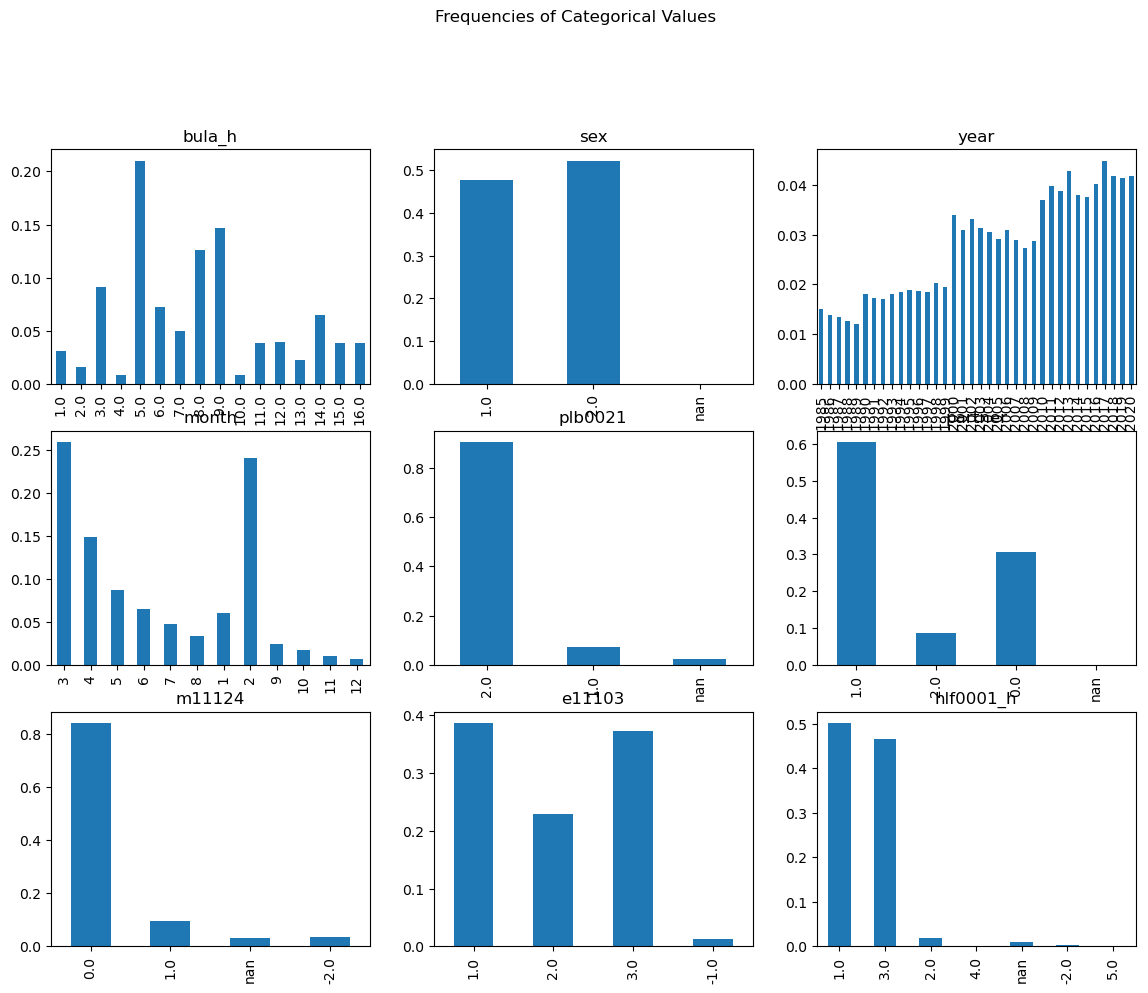

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(14,14))
fig.suptitle("Frequencies of Categorical Values")
for i, var in enumerate(categorical):
    ax = fig.add_subplot(1 + (len(categorical) // 3), 3, i+1)
    soep[var].value_counts(normalize=True, sort=False, dropna=False).plot(kind='bar', ax=ax)
    ax.set_title(var)

For the variables we perform calculations on it is important that we do not have $-2$ values i.e. *does not apply* as this can scew the data.

In [5]:
calc = [
    'plh0171', # satisfaction with health
    'plh0175', # satisfaction with hh income
    'plh0182'  # satisfaction with life
]
for var in calc:
    soep.loc[soep[var] <= 0, var] = np.nan

## Creating the Window

Here we create the window. Creating a window requires two parameters: 
- `interval`: This is the resampling rate which ensures that all timestamps allign and ensures that there are not that many missing values. There is a trade off with nan values and interval size. If the interval size is large then there are not as many timestamps as it is very likely that inside a big interval there is at least one observation. However, having a large interval size also decreases the granularity of the data which affects the predictive power of the model.
- `window_size`: This is the parameter for how many intervals should be included within one prediction. As SWB is not independant of previous timestemps we must include them. Having a larger window size increases the information you want to maintain from previous timestamps. Again, having the window size to large leads to more nan values.

In [6]:
def create_window(df, window_size=2, interval=5, start=1985):
    df.reset_index(inplace=True)
 
    # we need to fill in gap years in observations
    minyear, maxyear = min(df['yidx']), max(df['yidx'])        
    new_index = pd.MultiIndex.from_product(
        [df['pidx'].unique(), np.arange(minyear, maxyear+1)],
        names=['pidx', 'yidx']
    )
    
    # set the new index. Gap years are filled with nan values
    df = df.set_index(['pidx', 'yidx']).reindex(new_index)
    
    # interpolate TODO: check if this is ok
    df = df.groupby('pidx')\
           .ffill(limit=interval)\
           .dropna()
    
    # get all intervals
    df.reset_index(inplace=True)
    df = df.loc[(df['yidx'] - start) % interval == 0]
    
    # get all possible rows -> saves memory and computations
    df = df.sort_values(['pidx', 'yidx'])\
           .reset_index(drop=True)
    df = df.groupby(
                 ((df['yidx'].shift(-1) != df['yidx']+interval) |
                  (df['pidx'].shift(-1) != df['pidx'])).cumsum())\
           .filter(lambda x: x.shape[0] >= window_size)\
           .set_index(['pidx', 'yidx'])
    
    # create the first timestamp is created (just a ref to df)
    df = df.add_suffix('_0')
    t0_cols = list(df.columns)
    
    # create window
    for i in tqdm(range(1, window_size)):
        # shift year
        ti = df.loc[:, t0_cols].groupby('pidx').shift(-i)
        # set new column names
        ti.columns = list(map(lambda x: x[:-1]+str(i), ti.columns))
        # join with df
        df = df.join(ti, how='left')
        # Drop rows with gaps
        df.dropna(inplace=True)
    return df


# create window
interval, window_size = 2, 4
data = create_window(soep[timevariant], window_size, interval)

data

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  7.72it/s]


partner_0  month_0  plb0021_0  plh0171_0  plh0175_0  plh0182_0  \
pidx    yidx                                                                   
201     1995        0.0      4.0        2.0        5.0        5.0        7.0   
        1997        0.0      2.0        2.0        9.0        8.0        9.0   
203     1995        0.0      3.0        2.0        9.0        8.0        7.0   
        1997        0.0      2.0        1.0        8.0        8.0        3.0   
602     1995        1.0      3.0        2.0        6.0        6.0        7.0   
...                 ...      ...        ...        ...        ...        ...   
8262002 2005        2.0      5.0        1.0        8.0        4.0        8.0   
        2007        2.0      4.0        2.0        9.0        6.0        9.0   
8270602 2007        2.0      5.0        2.0        9.0        7.0        9.0   
8270802 2007        2.0      5.0        2.0        8.0        9.0        9.0   
8271102 2007        2.0      6.0        2.0        8.0        7.0        8.0   

              m11124_0  hlc0043_0  e11103_0  hlf0001_h_0  ...  \
pidx    yidx                                              ...   
201     1995       0.0        0.0       3.0          1.0  ...   
        1997       0.0        0.0       3.0          1.0  ...   
203     1995       0.0        0.0       2.0          1.0  ...   
        1997       0.0        0.0       1.0          1.0  ...   
602     1995       0.0        1.0       2.0          3.0  ...   
...                ...        ...       ...          ...  ...   
8262002 2005       0.0        1.0       3.0          1.0  ...   
        2007       0.0        0.0       2.0          1.0  ...   
8270602 2007       0.0        0.0       1.0          1.0  ...   
8270802 2007       0.0        0.0       2.0          3.0  ...   
8271102 2007       0.0        0.0       1.0          1.0  ...   

              tavgbin_3_Msum_3  tavgbin_4_Msum_3  tavgbin_5_Msum_3  \
pidx    yidx                                                         
201     1995               2.0               0.0               0.0   
        1997               0.0               0.0               0.0   
203     1995               0.0               0.0               0.0   
        1997               0.0               0.0               0.0   
602     1995               1.0               0.0               0.0   
...                        ...               ...               ...   
8262002 2005               0.0               0.0               0.0   
        2007               0.0               0.0               0.0   
8270602 2007               0.0               0.0               0.0   
8270802 2007               0.0               0.0               0.0   
8271102 2007              20.0               4.0               0.0   

              tavgbin_6_Msum_3  tavgbin_7_Msum_3  prcp_Mmean_3  tsun_Mmean_3  \
pidx    yidx                                                                   
201     1995               0.0               0.0      1.606667    169.750000   
        1997               0.0               0.0      1.590556     79.350000   
203     1995               0.0               0.0      1.186111    101.400000   
        1997               0.0               0.0      0.973333    124.750000   
602     1995               0.0               0.0      2.871323    119.050292   
...                        ...               ...           ...           ...   
8262002 2005               0.0               0.0      0.799031    191.918644   
        2007               0.0               0.0      2.879806     70.125711   
8270602 2007               0.0               0.0      2.903172     82.922263   
8270802 2007               0.0               0.0      1.212412    190.010669   
8271102 2007               0.0               0.0      2.613639    254.470588   

              wspd_Mmean_3  pres_Mmean_3  snow_Mmean_3  
pidx    yidx                                            
201     1995     14.526667   1005.906667     20.733333  
    

Because timeinvariant heterogeneity is a problem with panel data, relative values are taken of subjective variables. This should remove most of this bias.

In [7]:
# calculate derivatives
def deriv(data, var, window_size=2):
    for v in var:
        for t in range(window_size-1, 0, -1):
            data.loc[:, f'{v}_{t}'] = data[f'{v}_{t-1}'] - data[f'{v}_{t}']
        data.drop(columns=f'{v}_0', inplace=True)
    return data

data = deriv(data, derivs, window_size)

## Joining Timeinvariant Data
Now that the timeseries data is created, the timeinvarant data is joined back. These variables would have been the same across time and would have therefore not added any information to the data.

In [8]:
# merge with time invariant data
data = data.join(soep[timeinvariant], how='left')\
           .dropna()\
           .reset_index(drop=True)

# free memory
del soep

data

,partner_0,month_0,plb0021_0,m11124_0,hlc0043_0,e11103_0,hlf0001_h_0,hlc0005_h_0,tavgbin_0_Msum_0,tavgbin_1_Msum_0,...,tavgbin_7_Msum_3,prcp_Mmean_3,tsun_Mmean_3,wspd_Mmean_3,pres_Mmean_3,snow_Mmean_3,sex,bula_h,age,year
0,0.0,4.0,2.0,0.0,0.0,3.0,1.0,714.0,1.0,13.0,...,0.0,1.606667,169.750000,14.526667,1005.906667,20.733333,2.0,11.0,69.0,1995.0
1,0.0,2.0,2.0,0.0,0.0,3.0,1.0,618.0,7.0,16.0,...,0.0,1.590556,79.350000,20.261111,1013.724167,14.733333,2.0,11.0,71.0,1997.0
2,0.0,3.0,2.0,0.0,0.0,2.0,1.0,1227.0,1.0,12.0,...,0.0,1.186111,101.400000,11.828333,1015.275000,2.000000,1.0,11.0,35.0,1995.0
3,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1483.0,7.0,17.0,...,0.0,0.973333,124.750000,18.568333,1013.171667,10.533333,1.0,11.0,37.0,1997.0
4,1.0,3.0,2.0,0.0,1.0,2.0,3.0,4806.0,0.0,16.0,...,0.0,2.871323,119.050292,12.914227,1003.845446,13.971014,2.0,5.0,37.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52747,2.0,5.0,1.0,0.0,1.0,3.0,1.0,1700.0,0.0,0.0,...,0.0,0.799031,191.918644,10.396243,1020.425868,60.274669,1.0,9.0,34.0,2005.0
52748,2.0,4.0,2.0,0.0,0.0,2.0,1.0,1500.0,0.0,1.0,...,0.0,2.879806,70.125711,12.074574,1010.297958,116.479291,1.0,9.0,36.0,2007.0
52749,2.0,5.0,2.0,0.0,0.0,1.0,1.0,2100.0,0.0,1.0,...,0.0,2.903172,82.922263,12.252749,1014.552713,128.347242,1.0,9.0,26.0,2007.0
52750,2.0,5.0,2.0,0.0,0.0,2.0,3.0,2400.0,0.0,0.0,...,0.0,1.212412,190.010669,10.665055,1011.630025,36.861685,2.0,8.0,22.0,2007.0


## Create Dummies and Normalization

Here the `OneHotEncoder` from `sklearn` is used. This is more memory efficient than the pandas `get_dummies` function. However, the encoder by default encodes all variables of the dataset. Therefore, a `ColumnTransformer` is needed that splits categorical variables from the others. The non-categorical variables are not further processed. It would be possible to run a normalizer on the data. Regression models, however, do not require normalized data. 

An idea would be to first run a PCA to get fewer variables. This would make the computation less expensive. Should this be the case the data needs to be normalized.

In [9]:
# create x and y datasets
ypd = data[f'{target}_{window_size - 1}'] # last observation
Xpd = data[[x for x in data.columns if x != f'{target}_{window_size - 1}']]

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

# create the one hot encoder
ohe = OneHotEncoder(
    handle_unknown='ignore'
)

# create the normalizer
sc = StandardScaler()

# create categories for all of the columns
cats = []
for cat in categorical:
    # for each timevariant categorical variable suffixes need to be added
    if cat in timevariant:
        for i in range(0, window_size):
            cats.append(cat + f'_{i}')
    else:
        cats.append(cat)
non_cats = [x for x in list(Xpd.columns) if x not in cats]
        
# split the columns into categorical and numerical
ct = ColumnTransformer(
    transformers = [
        ('categorical', ohe, cats)
        #('non-categorical', sc, non_cats)
    ],
    remainder='passthrough'
)

In the following the PCA object is created. It can be added to the pipeline or not.

In [11]:
from sklearn.decomposition import PCA

# we take all the PC such that 98% of the data is explained
pca = PCA(n_components=0.98)

# Training

Training the model includes the following steps:
- Creating a baseline to examin performance of final model.
- Create random forest model.
- Run Gridsearch to find optimal hyper parameters.
- Take best found model to run test data on.
- Run test.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xpd, ypd, test_size=0.33)

## Baseline Model

The baseline model simply assumes that there is no change in swb since the last observation.

In [13]:
from sklearn.metrics import mean_absolute_error


y_pred = np.repeat(0, y_test.shape) # no change in swb
y_true = y_test
mean_absolute_error(y_true, y_pred)

1.0637026825205353

## Hyper Parameter Fitting

To find the best hyper parameters for the forest regressor gridsearch is used.
The best hp are then displayed

In [14]:
find_hp = False

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, StratifiedGroupKFold
from sklearn.pipeline import Pipeline


hp = {
    'max_depth' : range(410, 941, 10),
    'min_samples_split' : range(20, 90, 1),
    'min_samples_leaf' : range(1, 20, 1)
}

if find_hp:
    rfs = RandomForestRegressor(n_estimators=300, n_jobs=-1)
    gs = RandomizedSearchCV(rfs, hp, n_iter=1000, n_jobs=-1, scoring='neg_mean_squared_error', cv=3, verbose=5)

    pl = Pipeline(steps=[('preprocessing', ct), ('gridsearch', gs)])
    pl.fit(X_train, y_train)

In [16]:
if find_hp:
    # get best estimator
    rfs = gs.best_estimator_

    # get the cv results
    results = pd.DataFrame(gs.cv_results_)

    # sort the DataFrame based on mean_test_score in descending order
    results = results.sort_values(by='mean_test_score', ascending=False)

    # extract the hyperparameters and the mean test score
    hp = pd.DataFrame(results['params'].tolist())
    score = results['mean_test_score']

    # separate the hyperparameters into separate columns
    score = pd.concat([hp, score], axis=1)
    score.head(10)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

if not find_hp:
    # best forest regressor
    rfs = RandomForestRegressor(
        n_estimators=100, n_jobs=-1,
        max_features='sqrt',
        max_depth=300,
        min_samples_split=70,
        min_samples_leaf=20
    )


In [18]:
from sklearn.pipeline import Pipeline

pl1 = Pipeline(
    steps=[
        ('preprocessing', ct), 
        #('PC decomposition', pca), 
        ('regressor', rfs)])
pl1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bula_h', 'sex', 'year',
                                                   'month_0', 'month_1',
                                                   'month_2', 'month_3',
                                                   'plb0021_0', 'plb0021_1',
                                                   'plb0021_2', 'plb0021_3',
                                                   'partner_0', 'partner_1',
                                                   'partner_2', 'partner_3',
                                                   'm11124_0', 'm11124_1',
                                                   'm11124_2', 'm11124_3',
                                                   'e11103_0', 'e11103_1',
                                                   'e11103_2', 'e11103_3',
                                                   'hlf0001_h_0', 'hlf0001_h_1',
                                                   'hlf0001_h_2',
                                                   'hlf0001_h_3'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=300, max_features='sqrt',
                                       min_samples_leaf=20,
                                       min_samples_split=70, n_jobs=-1))])

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = pl1.predict(X_test)
print(f"mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

mean absolute error: 1.0024457754958103
R2 score: 0.20158117375600182


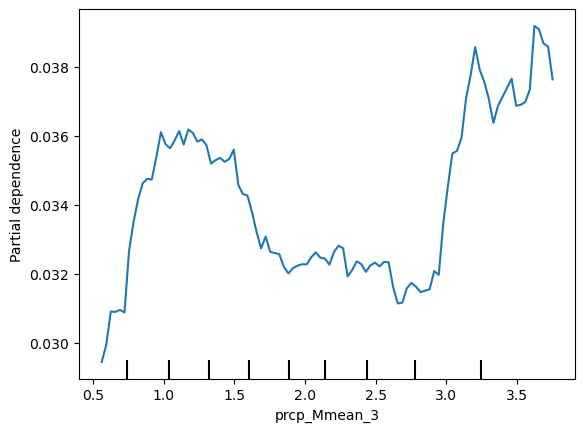

In [32]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(pl1, Xpd, ['prcp_Mmean_3'])